# Task # 4 - To Explore Decision Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

In [16]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

In [10]:
# Load the iris dataset
dt=pd.read_csv('Iris.csv')

In [11]:
dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
#statastical analysis
dt.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
#check the data types
dt.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [14]:
dt['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

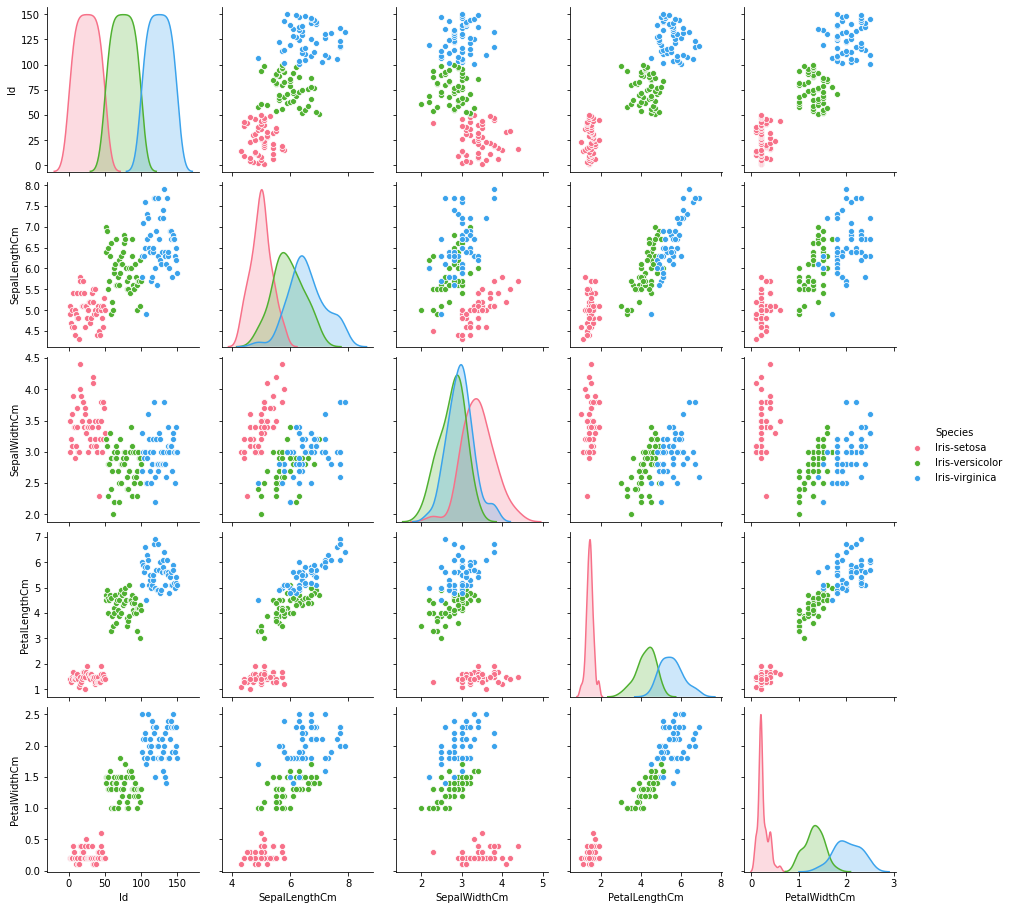

In [17]:
sns.pairplot(dt,hue='Species',palette='husl')

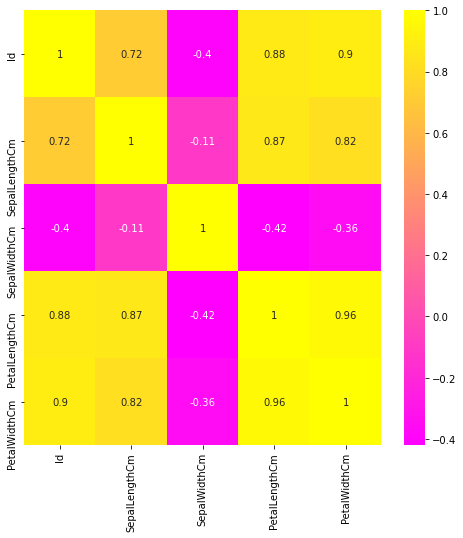

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(dt.corr(),annot=True,cmap='spring')

In [19]:
#separting independent and dependent variable to x and y
x=dt.iloc[:,1:5]
y=dt['Species']

In [20]:
#splitting x and y data to test and train
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [21]:
xtrain.shape

(105, 4)

In [22]:
ytrain.shape

(105,)

In [23]:
#fitting the model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [24]:
predictions = dtree.predict(xtest)

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(ytest,predictions))

Accuracy :  0.9333333333333333


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,predictions))

[[16  0  0]
 [ 0  9  0]
 [ 0  3 17]]


In [28]:
print(classification_report(ytest,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.75      1.00      0.86         9
 Iris-virginica       1.00      0.85      0.92        20

       accuracy                           0.93        45
      macro avg       0.92      0.95      0.93        45
   weighted avg       0.95      0.93      0.94        45



[Text(313.875, 489.24, 'X[2] <= 2.45\ngini = 0.661\nsamples = 105\nvalue = [34, 41, 30]'),
 Text(209.25, 380.52000000000004, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(418.5, 380.52000000000004, 'X[3] <= 1.75\ngini = 0.488\nsamples = 71\nvalue = [0, 41, 30]'),
 Text(209.25, 271.8, 'X[2] <= 5.35\ngini = 0.091\nsamples = 42\nvalue = [0, 40, 2]'),
 Text(104.625, 163.08000000000004, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(313.875, 163.08000000000004, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(627.75, 271.8, 'X[2] <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(523.125, 163.08000000000004, 'X[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(627.75, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(732.375, 163.08000000000004, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

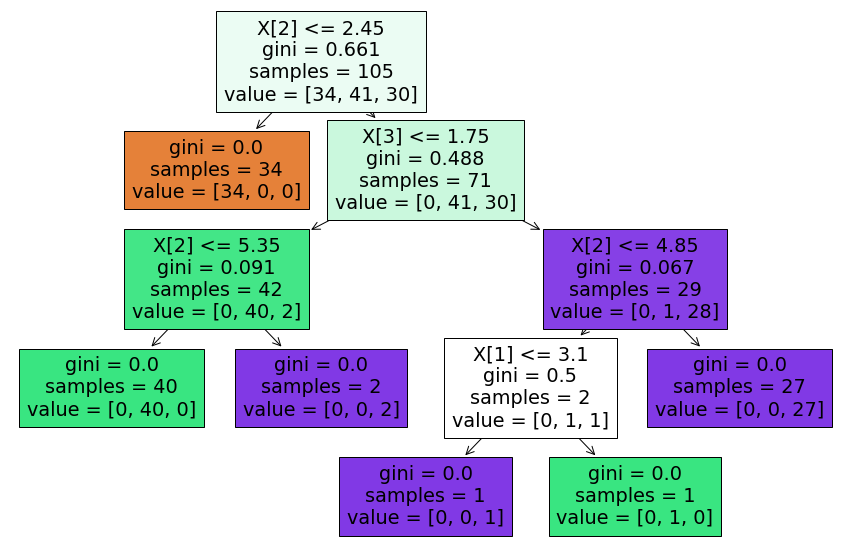

In [33]:
#ploting the tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)